<a href="https://colab.research.google.com/github/ilman79/PelatihanBNSP/blob/main/Assesment_BNSP_Ilman_Gifari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Visual Python di Jupyter Notebook
# https://visualpython.ai/use-extension
!pip install jupyterlab-visualpython
!visualpy install

/bin/bash: line 1: visualpy: command not found


In [2]:
# Loading Data Untuk Latihan
import warnings; warnings.simplefilter('ignore')
import pandas as pd
file_ = 'data/heart.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    df = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/arubhasy/dataset/main/heart.csv
    df = pd.read_csv(file_)

N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df.head()

baris =  918 , Kolom (jumlah variabel) =  12


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [4]:
varObjects = df.select_dtypes(include = ['object'])
varObjects.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [5]:
for col in varObjects.columns:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             911 non-null    float64 
 1   Sex             908 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(5), float64(2), int64(5)
memory usage: 55.5 KB


# Penelaahan Data




*   Variabel "ExerciseAngina","RestingECG" tidak ada sesuai dengan keterangan di sumber data, asumsikan variabel ini bermanfaat sehingga perlu dipisahkan terlebih dahulu.
*   Merubah tipe data variabel HeartDisease menjadi kategori





In [6]:
kolom_ygdipisahkan = ['ExerciseAngina', 'RestingECG']
df_baru = df.loc[:, ~df.columns.isin(kolom_ygdipisahkan)]

In [7]:
df_baru

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,172,0.0,Up,0
1,49.0,F,NAP,160,180,0,156,1.0,Flat,1
2,37.0,M,ATA,130,283,0,98,0.0,Up,0
3,48.0,F,ASY,138,214,0,108,1.5,Flat,1
4,54.0,M,NAP,150,195,0,122,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110,264,0,132,1.2,Flat,1
914,68.0,M,ASY,144,193,1,141,3.4,Flat,1
915,57.0,M,ASY,130,131,0,115,1.2,Flat,1
916,57.0,F,ATA,130,236,0,174,0.0,Flat,1


#Check Noise

In [8]:
df_baru.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,911.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,12.988393,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,177.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Terlihat bahwa pada variabel umur yaitu dengan umur 177 sehingga itu termasuk noise pada data

In [9]:
catVar = df_baru.select_dtypes(include = ['object', 'category'])

for col in catVar.columns:
    print(col,': ', set(df_baru[col].unique()))

Sex :  {'F', 'M', nan}
ChestPainType :  {'ATA', 'TA', 'NAP', 'ASY'}
ST_Slope :  {'Down', 'Flat', 'Up'}


Tidak terdapat noise pada variabel object dan category.

#Check Noise Pada Variabel Numerik

In [10]:
# import Module yang dibutuhkan untuk Visualisasi
import matplotlib.pyplot as plt, seaborn as sns
plt.style.use('bmh'); sns.color_palette("tab20"); sns.set()

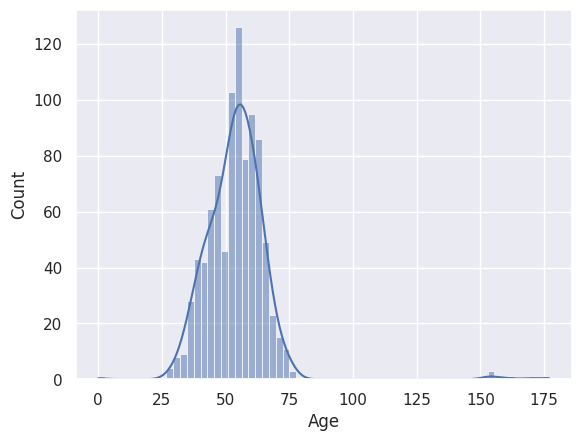

,Age
count,911.000000
mean,54.102086
std,12.988393
min,0.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,177.000000


In [11]:
# Visual Python: Visualization > Seaborn
# distribusi pada var Umur
sns.histplot(data=df_baru, x='Age', kde=True)
plt.show()
df_baru[['Age']].describe()

Perlu dilakukan penanganan noise pada variabel Age, karena terdapat 0 kita asumsinya salah dalam menginputkan data sehingga kita jadikan nan dahulu

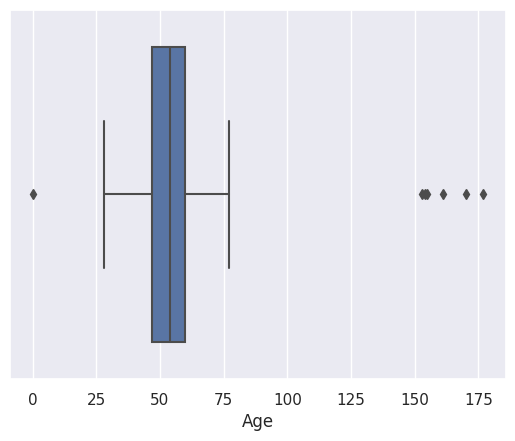

In [12]:
# Visual Python: Visualization > Seaborn
# cek outlier pada variabel numerik penghasilan
p = sns.boxplot(x="Age", data=df_baru)
plt.show()

Menghapus umur yang lebih dari 150 dan mengasumsikan umur 0 itu adalah missing value

In [13]:
# jika outlier difilter
Q1 = df_baru['Age'].quantile(0.25)
Q3 = df_baru['Age'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

df_baru = df_baru.drop(df_baru[df_baru.Age > Q3+1.5*IQR].index)
df_baru.shape

Q1=47.0, Q3=60.0, IQR=13.0


(912, 10)

In [14]:
df_baru

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,172,0.0,Up,0
1,49.0,F,NAP,160,180,0,156,1.0,Flat,1
2,37.0,M,ATA,130,283,0,98,0.0,Up,0
3,48.0,F,ASY,138,214,0,108,1.5,Flat,1
4,54.0,M,NAP,150,195,0,122,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110,264,0,132,1.2,Flat,1
914,68.0,M,ASY,144,193,1,141,3.4,Flat,1
915,57.0,M,ASY,130,131,0,115,1.2,Flat,1
916,57.0,F,ATA,130,236,0,174,0.0,Flat,1


In [15]:
import numpy as np
df_baru['Age'] = df_baru['Age'].replace(to_replace="0.0", value=np.nan)

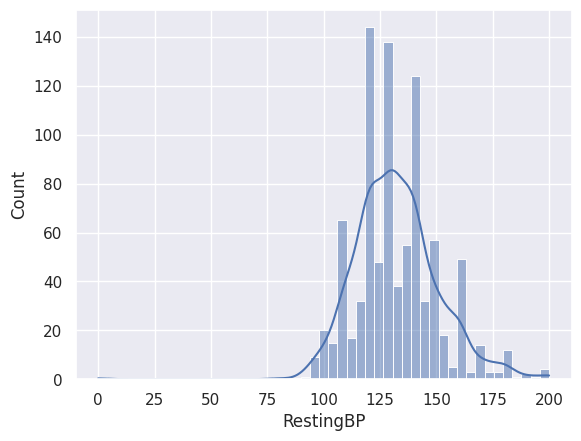

,RestingBP
count,912.000000
mean,132.339912
std,18.527300
min,0.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


In [16]:
# Visual Python: Visualization > Seaborn
# distribusi pada var RestingBP
sns.histplot(data=df_baru, x='RestingBP', kde=True)
plt.show()
df_baru[['RestingBP']].describe()

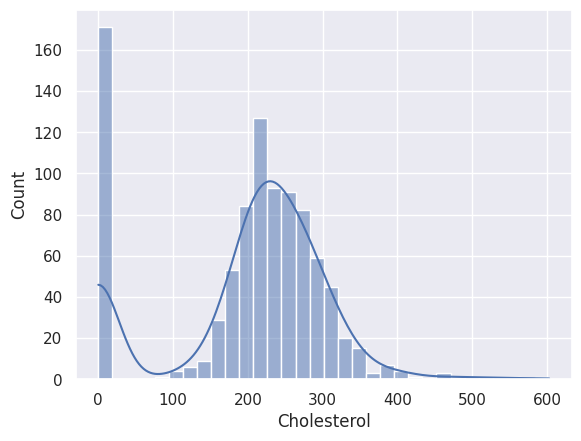

,Cholesterol
count,912.000000
mean,198.817982
std,109.481022
min,0.000000
25%,173.750000
50%,222.500000
75%,267.000000
max,603.000000


In [17]:
# Visual Python: Visualization > Seaborn
# distribusi pada var Cholesterol
sns.histplot(data=df_baru, x='Cholesterol', kde=True)
plt.show()
df_baru[['Cholesterol']].describe()

Karena ada ada data yang value 0 maka kita asumsikan salah input maka dari itu dengan cara penanganannya diimputasikan dengan nilai rata-rata dan 600 kita asumsikan sesuai dengan data yang terjadi.

In [18]:
df_baru[['Cholesterol']] = df_baru[['Cholesterol']].replace(to_replace="0.0", value=df_baru[['Cholesterol']].mean())

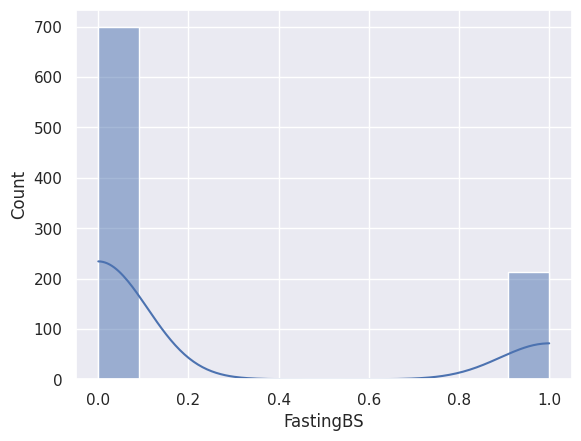

,FastingBS
count,912.000000
mean,0.233553
std,0.423323
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [19]:
# Visual Python: Visualization > Seaborn
# distribusi pada var Cholesterol
sns.histplot(data=df_baru, x='FastingBS', kde=True)
plt.show()
df_baru[['FastingBS']].describe()

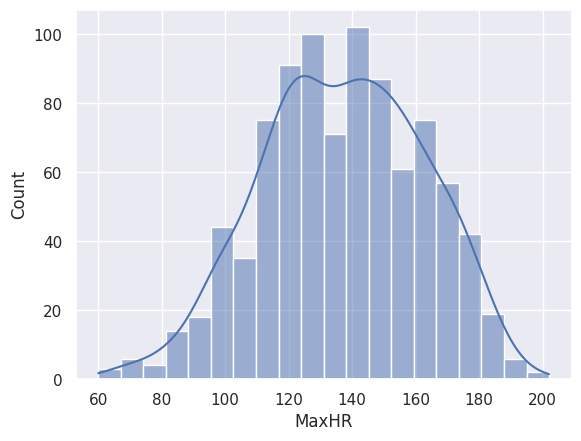

,MaxHR
count,912.000000
mean,136.891447
std,25.493553
min,60.000000
25%,120.000000
50%,138.000000
75%,156.000000
max,202.000000


In [20]:
# Visual Python: Visualization > Seaborn
# distribusi pada var MaxHR
sns.histplot(data=df_baru, x='MaxHR', kde=True)
plt.show()
df_baru[['MaxHR']].describe()


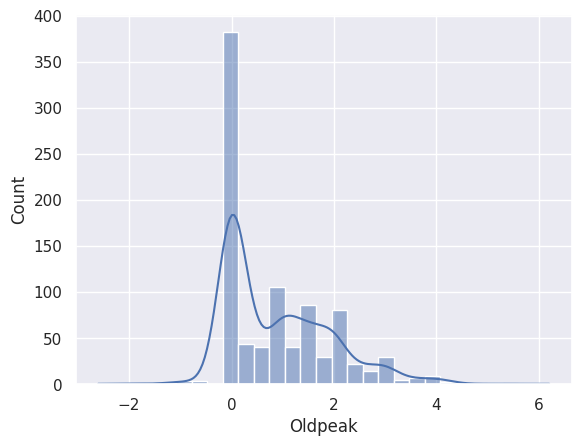

,Oldpeak
count,912.000000
mean,0.885855
std,1.067547
min,-2.600000
25%,0.000000
50%,0.550000
75%,1.500000
max,6.200000


In [21]:
# Visual Python: Visualization > Seaborn
# distribusi pada var Oldpeak
sns.histplot(data=df_baru, x='Oldpeak', kde=True)
plt.show()
df_baru[['Oldpeak']].describe()

kita akan cek pada tahap outlier, apakah nilai -2,6 adalah outlier atau memang data nyatanya.

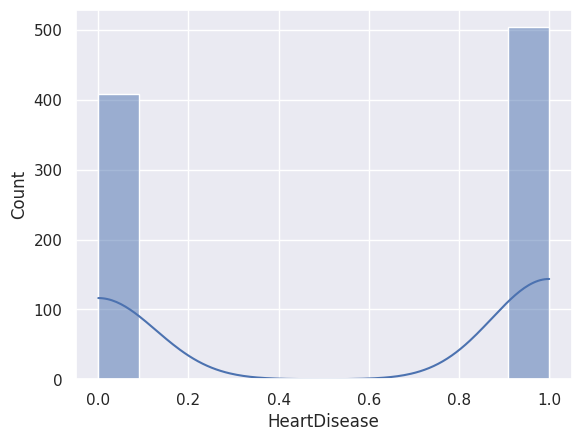

,HeartDisease
count,912.000000
mean,0.552632
std,0.497495
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [22]:
# Visual Python: Visualization > Seaborn
# distribusi pada var Oldpeak
sns.histplot(data=df_baru, x='HeartDisease', kde=True)
plt.show()
df_baru[['HeartDisease']].describe()

# Cek Duplikasi

In [23]:
# mengecek apakah ada duplikat data sangatlah mudah menggunakan Pandas
print(df_baru.shape)
print("jumlah data yang duplikat", df_baru.duplicated().sum())
df_baru[df_baru.duplicated() == True]

(912, 10)
jumlah data yang duplikat 1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease
595,60.0,M,ASY,130,186,1,140,0.5,Flat,1


## Melakukan penanganan pada duplikasi

In [24]:
# menghapus entri yang memiliki data duplikat
df_baru.drop_duplicates(keep="first", inplace=True)
print(df_baru.duplicated().sum()) # no more duplicates
print(df_baru.shape) # re-check by printing data size

0
(911, 10)


# Cek Outlier

In [25]:
# Visual Python: Visualization > Seaborn
def vp_seaborn_show_values(axs, precision=1, space=0.01):
    pstr = '{:.' + str(precision) + 'f}'

    def _single(ax):
        # check orient
        orient = 'v'
        if len(ax.patches) == 1:
            # check if 0
            if ax.patches[0].get_x() == 0:
                orient = 'h'
        else:
            # compare 0, 1 patches
            p0 = ax.patches[0]
            p1 = ax.patches[1]
            if p0.get_x() == p1.get_x():
                orient = 'h'

        if orient == 'v':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*space)
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_height())
                    ax.text(_x, _y, value, ha='center')
        elif orient == 'h':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + (space - 0.01)
                _y = p.get_y() + p.get_height() / 2
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_width())
                    ax.text(_x, _y, value, ha='left')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

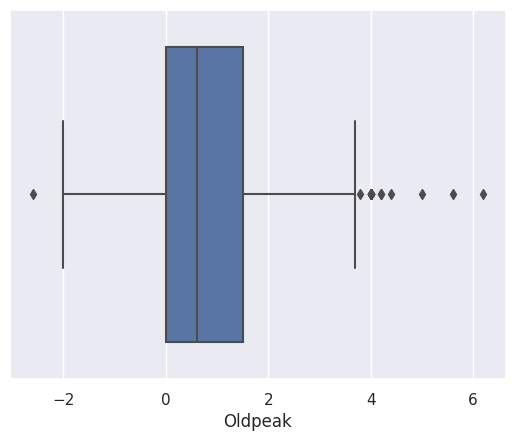

In [26]:
# Visual Python: Visualization > Seaborn
import numpy as np
p = sns.boxplot(x="Oldpeak", data=df_baru)
plt.show()

Kita asumsikan datanya adalah sebagai outlier dan penanganannya harus dihapuskan.

Q1=0.0, Q3=1.5, IQR=1.5


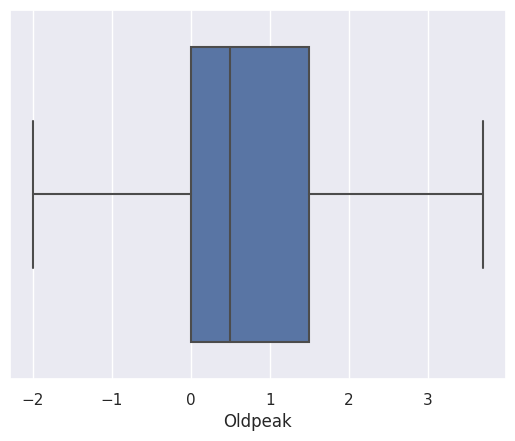

(895, 10)

In [27]:
# jika outlier difilter
Q1 = df_baru['Oldpeak'].quantile(0.25)
Q3 = df_baru['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

df_baru = df_baru.drop(df_baru[(df_baru.Oldpeak < Q1-1.5*IQR) | (df_baru.Oldpeak > Q3+1.5*IQR)].index)
p = sns.boxplot(x="Oldpeak", data=df_baru)
plt.show()
df_baru.shape

# Cek missing value

In [28]:
# General Look at the Missing Values
print(df_baru.isnull().sum())

Age               7
Sex              10
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
MaxHR             0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [29]:
# cek persentase missing tiap variabel
(df_baru.isnull().sum()/len(df)*100).to_frame('persentase missing')

,persentase missing
Age,0.762527
Sex,1.089325
ChestPainType,0.000000
RestingBP,0.000000
Cholesterol,0.000000
FastingBS,0.000000
MaxHR,0.000000
Oldpeak,0.000000
ST_Slope,0.000000
HeartDisease,0.000000


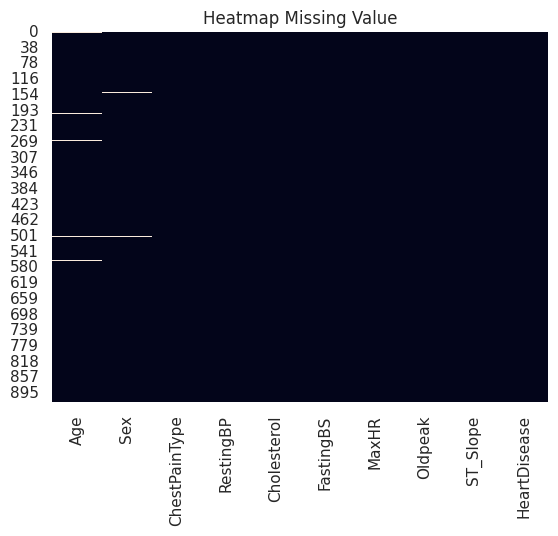

In [30]:
# visualisasi missing value
sns.heatmap(df_baru.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

Untuk penanganan missing value kita menggunakan penanangan untuk dihapuskan

In [31]:
X = df_baru.dropna()
print(df_baru.shape, X.shape)
X.head()

(895, 10) (879, 10)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease
1,49.0,F,NAP,160,180,0,156,1.0,Flat,1
2,37.0,M,ATA,130,283,0,98,0.0,Up,0
3,48.0,F,ASY,138,214,0,108,1.5,Flat,1
4,54.0,M,NAP,150,195,0,122,0.0,Up,0
5,39.0,M,NAP,120,339,0,170,0.0,Up,0


In [32]:
print(X.isnull().sum())

Age              0
Sex              0
ChestPainType    0
RestingBP        0
Cholesterol      0
FastingBS        0
MaxHR            0
Oldpeak          0
ST_Slope         0
HeartDisease     0
dtype: int64


#Tranformasi

####One-Hot-Encoding

In [33]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease
1,49.0,F,NAP,160,180,0,156,1.0,Flat,1
2,37.0,M,ATA,130,283,0,98,0.0,Up,0
3,48.0,F,ASY,138,214,0,108,1.5,Flat,1
4,54.0,M,NAP,150,195,0,122,0.0,Up,0
5,39.0,M,NAP,120,339,0,170,0.0,Up,0


In [34]:
print(X.shape)
for col in catVar.columns:
    if col != ['HeartDisease','FastingBS']:
        transformasi = pd.get_dummies(X[col], prefix='')
        X = pd.concat([X, transformasi], axis = 1)
        # Hapus Variabel Kategorik Awal, Sudah tidak diperlukan
        try:
            X.drop([col], axis=1, inplace=True)
        except Exception as err_:
            print(err_)
print(X.shape)
X.head()

(879, 10)
(879, 16)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,_F,_M,_ASY,_ATA,_NAP,_TA,_Down,_Flat,_Up
1,49.0,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0
2,37.0,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1
3,48.0,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0
4,54.0,150,195,0,122,0.0,0,0,1,0,0,1,0,0,0,1
5,39.0,120,339,0,170,0.0,0,0,1,0,0,1,0,0,0,1


In [35]:
X.to_csv("data/HeartDieses_PreProcessed.csv", encoding='utf8', index=False)

#Klasifikasi Model

In [36]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

In [37]:
# Loading Data Preprocessed
file_ = 'data/HeartDieses_PreProcessed.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    df_pre = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/ilman79/PelatihanBNSP/main/HeartDieses_PreProcessed.csv
    df_pre = pd.read_csv(file_)

N, P = df_pre.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df_pre.head()

baris =  879 , Kolom (jumlah variabel) =  16


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,_F,_M,_ASY,_ATA,_NAP,_TA,_Down,_Flat,_Up
0,49.0,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0
1,37.0,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1
2,48.0,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0
3,54.0,150,195,0,122,0.0,0,0,1,0,0,1,0,0,0,1
4,39.0,120,339,0,170,0.0,0,0,1,0,0,1,0,0,0,1


#Train dan Test Data

In [38]:
predictor = df_pre.loc[:, ~df_pre.columns.isin(['HeartDisease'])]
target = df_pre['HeartDisease']

xTrain, xTest, yTrain, yTest = train_test_split(predictor, target, test_size=0.4, random_state=30) #fungsi rekursif; proses probabilistik untuk hasilnya bisa divalidasi
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(527, 15) (527,)
(352, 15) (352,)


#Model Regresi Logistik

In [39]:
reglog = LogisticRegression().fit(xTrain, yTrain)
prediksi_regLog = reglog.predict(xTest)
print(confusion_matrix(yTest, prediksi_regLog))
print(classification_report(yTest, prediksi_regLog))

[[133  28]
 [ 20 171]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       161
           1       0.86      0.90      0.88       191

    accuracy                           0.86       352
   macro avg       0.86      0.86      0.86       352
weighted avg       0.86      0.86      0.86       352



#Cross Validasi

In [40]:
mulai = time.time()
scores_regLog = cross_val_score(reglog, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.84 (+/- 0.13), Waktu = 0.329 detik


RegLog    0.715909
dtype: float64

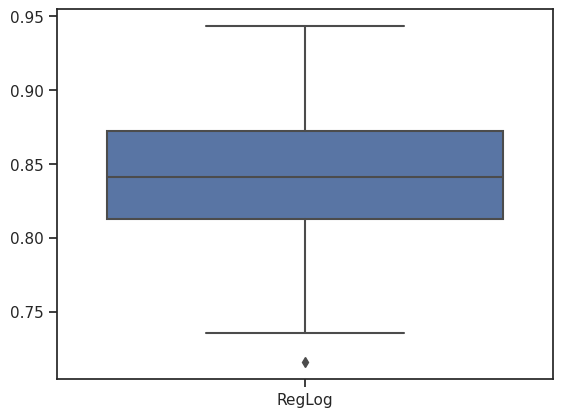

In [41]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog})
p = sns.boxplot(data = df_)
df_.min()

#Model Decision Tree

In [42]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
DT = tree.DecisionTreeClassifier()
# Sengaja menggunakan default parameter, (Hyper)parameter Optimization akan dibahas kemudian
DT = DT.fit(xTrain, yTrain)
prediksi_DT = DT.predict(xTest)

print(confusion_matrix(yTest, prediksi_DT))
print(classification_report(yTest, prediksi_DT))

[[132  29]
 [ 40 151]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       161
           1       0.84      0.79      0.81       191

    accuracy                           0.80       352
   macro avg       0.80      0.81      0.80       352
weighted avg       0.81      0.80      0.80       352



In [43]:
mulai = time.time()
scores_dt = cross_val_score(DT, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.77 (+/- 0.11), Waktu = 0.164 detik


RegLog     0.715909
DecTree    0.689655
dtype: float64

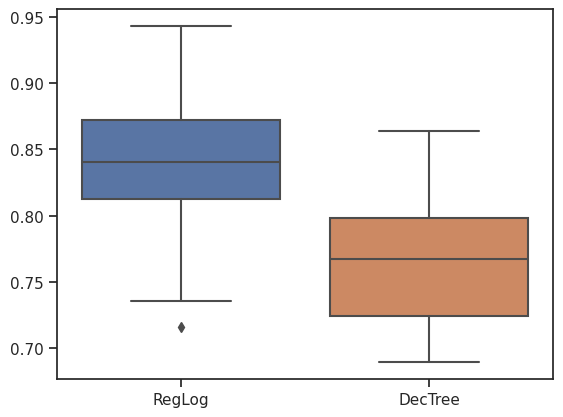

In [44]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog, "DecTree":scores_dt})
p = sns.boxplot(data = df_)
df_.min()

In [45]:
# Atau secara programmatic
from sklearn.pipeline import make_pipeline
from sklearn import linear_model #import LogisticRegression

pipeSVM = make_pipeline(linear_model.LogisticRegression())
print(sorted(pipeSVM.get_params().keys()))

['logisticregression', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start', 'memory', 'steps', 'verbose']


In [46]:
# Hyperparameter optimization pada model Regresi Logistik menggunakan gridCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'class_weight':[None, 'balanced']}]

grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_search.fit(xTrain, yTrain)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
0.8538724168912848
{'solver': 'newton-cg'}


In [47]:
pipeDT = make_pipeline(tree.DecisionTreeClassifier())
print(sorted(pipeDT.get_params().keys()))

['decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter', 'memory', 'steps', 'verbose']


In [48]:
# Optimal parameter Desion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtree_model=DecisionTreeClassifier()
dtree_gscv = RandomizedSearchCV(dtree_model, param_grid, cv=10)
dtree_gscv.fit(xTrain, yTrain)

print(dtree_gscv.best_score_)
print(dtree_gscv.best_params_)

0.8140783744557331
{'max_depth': 6, 'criterion': 'gini'}


#Model Selection

Accuracy RL: 0.82 (+/- 0.10)
Accuracy DT: 0.77 (+/- 0.09)


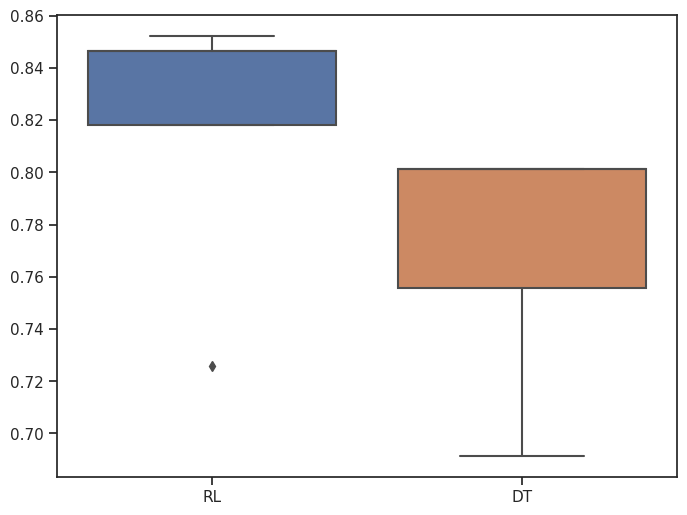

In [49]:
kCV = 5 # Aslinya usahakan 10, idealnya 30 ... mengapa?
# Menggunakan parameter optimal
RL_opt = LogisticRegression(solver= 'newton-cg')
DT_opt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

# Melakukan Cross Validasi
models = ['RL', 'DT']
RL_score = cross_val_score(RL_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
DT_score = cross_val_score(DT_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
scores = [RL_score, DT_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
p = sns.boxplot(data=pd.DataFrame(data), ax=ax)